In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
pd.options.mode.chained_assignment = None
url = 'https://raw.githubusercontent.com/Kobi-Mazuz/Final_task/main/Instagram_Data.csv'
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178922 entries, 0 to 178921
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   User uuid              178922 non-null  int64  
 1   Likes                  178922 non-null  int64  
 2   Days passed from post  178922 non-null  int64  
 3   Likes Score            178922 non-null  float64
 4   Type                   178922 non-null  object 
 5   Numer of Tags          178922 non-null  int64  
 6   Numer of Comments      178922 non-null  int64  
 7   Date Posted            178922 non-null  object 
 8   Year                   178922 non-null  int64  
 9   Month                  178922 non-null  int64  
 10  Day                    178922 non-null  int64  
 11  Hour                   178922 non-null  int64  
 12  Minute                 178922 non-null  int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 17.7+ MB


In [2]:
df.isnull().sum()

User uuid                0
Likes                    0
Days passed from post    0
Likes Score              0
Type                     0
Numer of Tags            0
Numer of Comments        0
Date Posted              0
Year                     0
Month                    0
Day                      0
Hour                     0
Minute                   0
dtype: int64

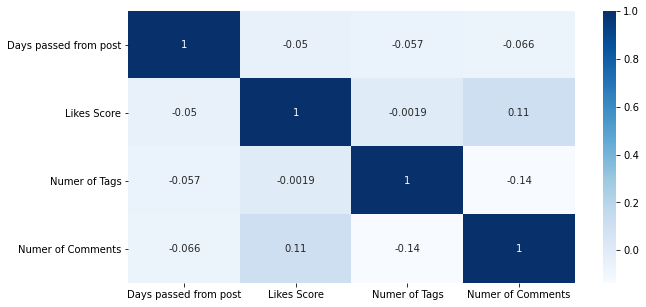

In [3]:
corr_df = df[['Days passed from post',"Likes Score","Numer of Tags","Numer of Comments"]]
corr_df = corr_df.corr(method='spearman')
plt.figure(figsize = (10,5))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.heatmap(data=corr_df,cmap='Blues', annot=True)
plt.show()

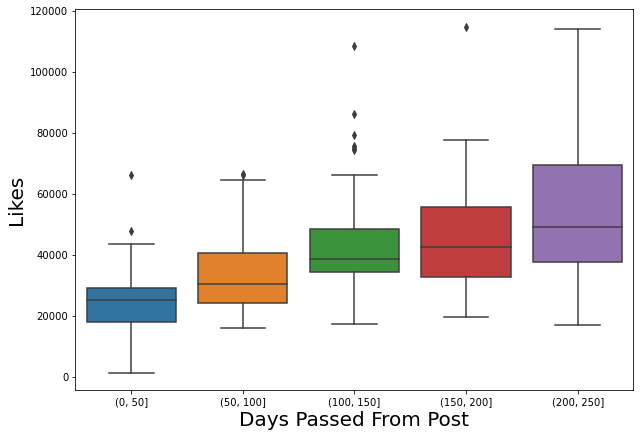

In [4]:
days_passed_df = df[["Days passed from post","Likes"]]
likes_score_mean = df["Likes"].mean()
days_passed_df = days_passed_df.groupby("Days passed from post")[["Days passed from post","Likes"]].mean()
days_passed_df['binned'] = pd.cut(days_passed_df["Days passed from post"],bins=range(0, 300, 50))

fig, ax = plt.subplots()
sns.boxplot(x="binned", y="Likes", data=days_passed_df)
plt.xlabel("Days Passed From Post",fontsize=20)
plt.ylabel("Likes",fontsize=20)
fig.set_size_inches(10, 7)
plt.show()

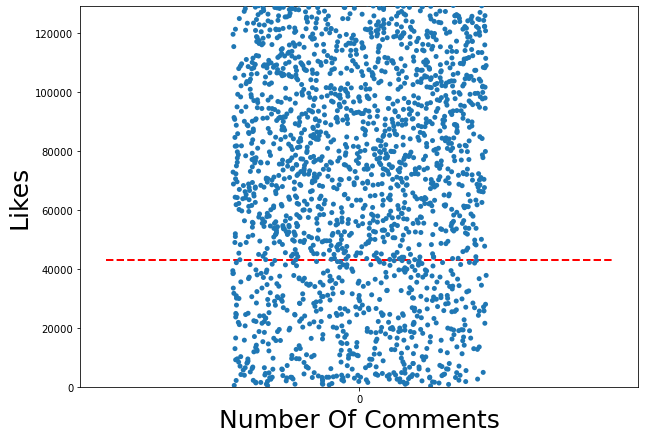

In [5]:
comm_df = df[["Numer of Comments", "Likes"]]
likes_mean = comm_df["Likes"].mean()
comm_df = comm_df.groupby("Numer of Comments")["Likes"].mean()
fig, ax = plt.subplots()
sns.stripplot(data=comm_df,label="Number Of Comments")
fig.set_size_inches(10, 7)
plt.xlabel("Number Of Comments",fontsize=25)
plt.ylabel("Likes",fontsize=25)
ax.hlines(y=likes_mean, xmin=-0.2, xmax=0.2, linewidth=2, color='r',linestyle='--',label="Mean")
plt.ylim((0, likes_mean*3))
plt.show()

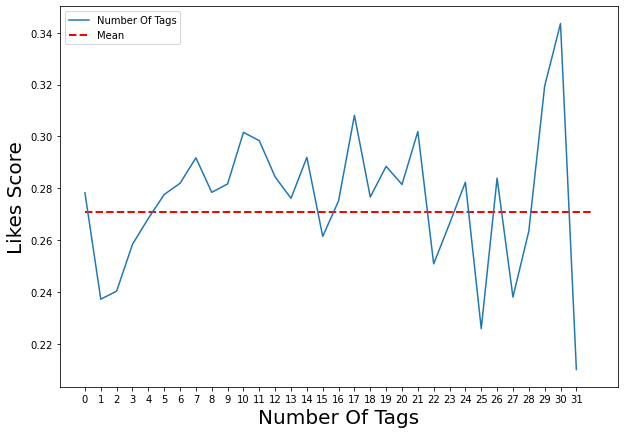

In [6]:
tag_df = df[["Numer of Tags", "Likes Score"]]
likes_score_mean = tag_df["Likes Score"].mean()
tag_df = tag_df.groupby("Numer of Tags")["Likes Score"].mean()
fig, ax = plt.subplots()
sns.lineplot(data=tag_df,label="Number Of Tags")
fig.set_size_inches(10, 7)
plt.xlabel("Number Of Tags",fontsize=20)
plt.ylabel("Likes Score",fontsize=20)
ax.hlines(y=likes_score_mean, xmin=0, xmax=32, linewidth=2, color='r',linestyle='--',label="Mean")
plt.xticks(np.arange(0, 32, 1))
plt.legend()
plt.show()

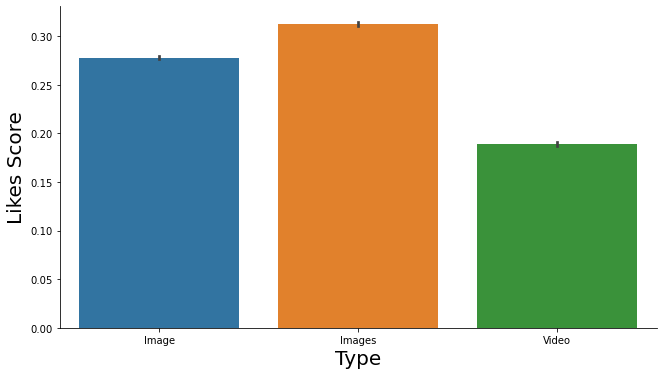

In [7]:
type_df = df[["Type", "Likes Score"]]
sns.catplot(data=type_df, kind="bar", x="Type", y = "Likes Score",height=5,aspect=1.8)
plt.xlabel("Type",fontsize=20)
plt.ylabel("Likes Score",fontsize=20)
plt.show()

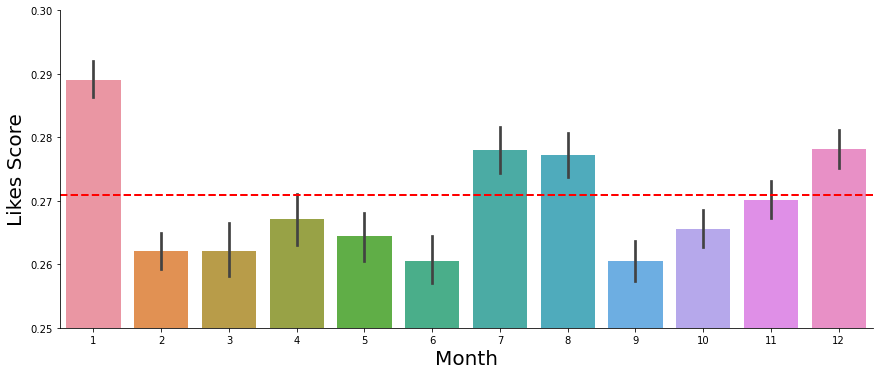

In [8]:
month_df = df[["Month","Likes Score"]]
month_plot = sns.catplot(x="Month",
            y="Likes Score", 
            data=month_df, 
            kind='bar',
            height=5,
            aspect=2.4)
plt.ylim((0.25, 0.3))
plt.xticks(np.arange(0, 12, 1))
month_plot.map(plt.axhline, y=likes_score_mean, ls='--', color='r', linewidth=2)
plt.xlabel("Month",fontsize=20)
plt.ylabel("Likes Score",fontsize=20)
plt.show()

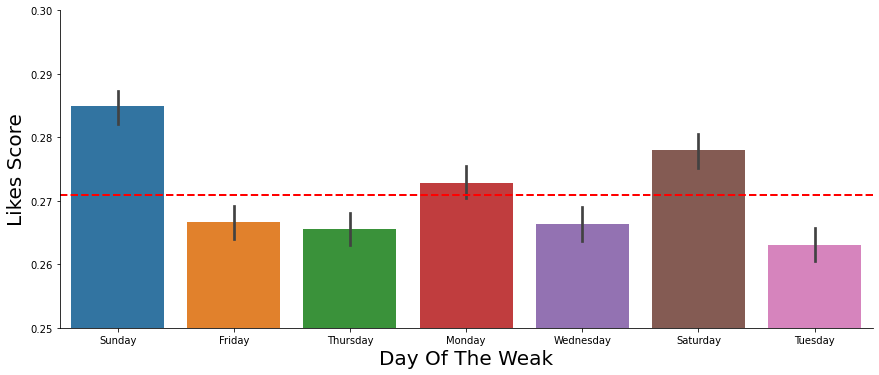

In [9]:
df['Date Posted'] = pd.to_datetime(df['Date Posted'])
df['Day Name']=df['Date Posted'].dt.strftime("%A")
day_df = df[["Day Name","Likes Score"]]
day_plot = sns.catplot(x="Day Name",
            y="Likes Score", 
            data=day_df, 
            kind='bar',
            height=5,
            aspect=2.4)
plt.ylim((0.25, 0.3))
plt.xticks(np.arange(0, 7, 1))
day_plot.map(plt.axhline, y=likes_score_mean, ls='--', color='r', linewidth=2)
plt.xlabel("Day Of The Weak",fontsize=20)
plt.ylabel("Likes Score",fontsize=20)
plt.show()

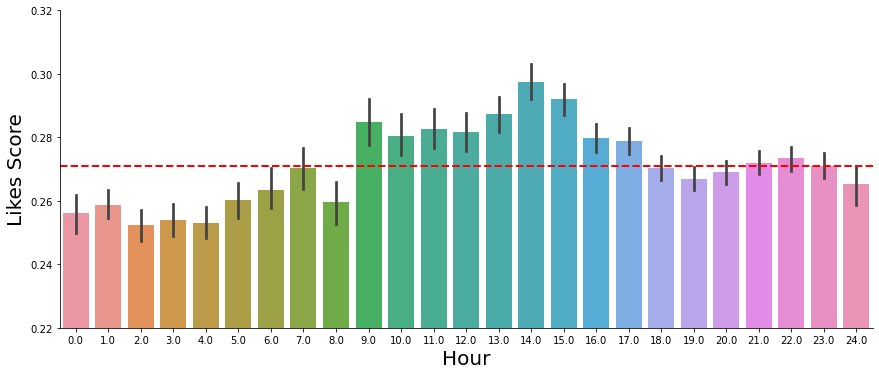

In [10]:
hour_min_df = df[["Likes Score","Hour","Minute"]]
hour_min_df["Hour"] = round(df["Hour"]+df["Minute"]/60)
hour_min_df.drop(["Minute"],axis=1,inplace=True)
hour_plot= sns.catplot(x="Hour",
            y="Likes Score", 
            data=hour_min_df, 
            kind='bar',
            height=5,
            aspect=2.4)
plt.ylim((0.22, 0.32))
plt.xticks(np.arange(0, 25, 1))
hour_plot.map(plt.axhline, y=likes_score_mean, ls='--', color='r', linewidth=2)
plt.xlabel("Hour",fontsize=20)
plt.ylabel("Likes Score",fontsize=20)
plt.show()